### Correlation Analysis

#### Data Preparation and processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# List of stock CSV files
stock_files = [
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\AAPL_historical_data.csv', 
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\AMZN_historical_data.csv', 
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\GOOG_historical_data.csv',
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\META_historical_data.csv', 
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\MSFT_historical_data.csv', 
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\NVDA_historical_data.csv', 
    r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\TSLA_historical_data.csv'
]

# Load the news data
news_data = pd.read_csv(r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\raw_analyst_ratings\raw_analyst_ratings.csv')

# Convert the 'date' column to datetime with timezone UTC
news_data['date'] = pd.to_datetime(news_data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# Initialize a list to store the aligned data for each stock
aligned_dfs = []

# Loop through each stock file
for stock_file in stock_files:
    # Load the stock data
    stock_data = pd.read_csv(stock_file)
    
    # Convert the 'Date' column to datetime with timezone UTC
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize('UTC')
    
    # Filter stock data to start from the first date in the news data
    start_date = news_data['date'].min()
    filtered_stock_data = stock_data[stock_data['Date'] >= start_date]
    
    # Perform an inner join to keep only matching dates
    aligned_data = pd.merge(filtered_stock_data, news_data, left_on='Date', right_on='date', how='inner')
    
    # Add a column to identify the stock
    stock_name = os.path.basename(stock_file).split('_')[0]  # Extract stock name from file name
    aligned_data['Stock'] = stock_name
    
    # Append the aligned data to the list
    aligned_dfs.append(aligned_data)

# Concatenate all aligned data into one DataFrame
final_data = pd.concat(aligned_dfs, ignore_index=True)

In [2]:
#ensure missing values
print(final_data.isnull().sum())


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Unnamed: 0      0
headline        0
url             0
publisher       0
date            0
stock           0
Stock           0
dtype: int64


In [3]:
# Check the date range 
print(f"Date range in final data: {final_data['Date'].min()} to {final_data['Date'].max()}")


Date range in final data: 2009-04-27 00:00:00+00:00 to 2020-06-03 00:00:00+00:00


In [4]:
#Check for duplicate data
print(f"Number of duplicate rows: {final_data.duplicated().sum()}")

Number of duplicate rows: 0


In [5]:
#print sample data
print(final_data.head())
print(final_data.info())


                       Date      Open      High       Low     Close  \
0 2009-04-27 00:00:00+00:00  4.389286  4.464286  4.380714  4.454643   
1 2009-04-27 00:00:00+00:00  4.389286  4.464286  4.380714  4.454643   
2 2009-04-29 00:00:00+00:00  4.458929  4.530357  4.422500  4.469286   
3 2009-05-22 00:00:00+00:00  4.430357  4.435000  4.348214  4.375000   
4 2009-05-27 00:00:00+00:00  4.706429  4.820714  4.675357  4.751786   

   Adj Close     Volume  Dividends  Stock Splits  Unnamed: 0  \
0   3.761836  480690000        0.0           0.0      522587   
1   3.761836  480690000        0.0           0.0     1396488   
2   3.774201  458110800        0.0           0.0        1834   
3   3.694580  297998400        0.0           0.0       68387   
4   4.012765  646422000        0.0           0.0      430147   

                                            headline  \
0      Update on the Luxury Sector: 2nd Quarter 2009   
1      Update on the Luxury Sector: 2nd Quarter 2009   
2                   

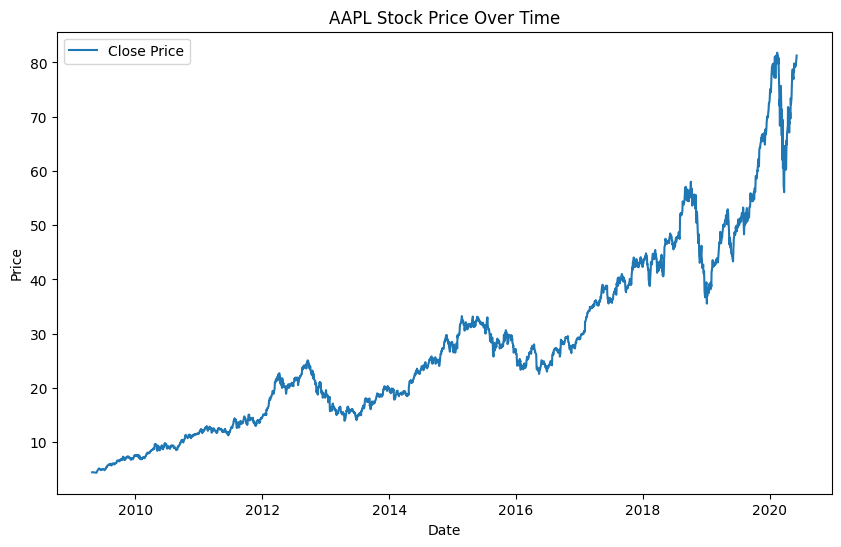

In [6]:
# Plotting stock price for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AAPL']
plt.figure(figsize=(10, 6))
plt.plot(sample_stock['Date'], sample_stock['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Over Time')
plt.legend()
plt.show()


### Perform Sentiment analysis for the period

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_vader(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
final_data['sentiment'] = final_data['headline'].apply(get_sentiment_vader)


In [8]:
# Print the first 10 rows of the DataFrame with the sentiment scores
print(final_data[['Date', 'headline', 'sentiment']].head(10))

                       Date  \
0 2009-04-27 00:00:00+00:00   
1 2009-04-27 00:00:00+00:00   
2 2009-04-29 00:00:00+00:00   
3 2009-05-22 00:00:00+00:00   
4 2009-05-27 00:00:00+00:00   
5 2009-05-27 00:00:00+00:00   
6 2009-05-27 00:00:00+00:00   
7 2009-05-27 00:00:00+00:00   
8 2009-05-27 00:00:00+00:00   
9 2009-05-27 00:00:00+00:00   

                                            headline  sentiment  
0      Update on the Luxury Sector: 2nd Quarter 2009     0.0000  
1      Update on the Luxury Sector: 2nd Quarter 2009     0.0000  
2                             Going Against the Herd     0.0000  
3  Charles Sizemore Radio Interview Saturday Morning     0.0000  
4  MRM a $15-$20+ stock - FIT new information - J...     0.7925  
5  JVA perks to 39% gain, SMCG ready, MRM to cont...     0.7096  
6  JVA perks to 39% gain, SMCG ready, MRM to cont...     0.7096  
7  MRM a $15-$20+ stock - FIT new information - J...     0.7925  
8  JVA perks to 39% gain, SMCG ready, MRM to cont...     0.7096 

#### Calculate Daily Stock Returns

In [9]:
# Calculate daily stock returns
final_data['daily_return'] = final_data.groupby('Stock')['Close'].pct_change()

#### Calculate the correlation between daily news sentiment scores and stock returns for each stock.

In [10]:
# Group by stock and calculate correlations
correlations = final_data.groupby('Stock').apply(lambda x: x[['sentiment', 'daily_return']].corr().iloc[0, 1])

print(correlations)


Stock
AAPL    0.002962
AMZN    0.002370
GOOG    0.003093
META    0.001356
MSFT    0.002537
NVDA    0.002139
TSLA    0.001622
dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1136\2547885791.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = final_data.groupby('Stock').apply(lambda x: x[['sentiment', 'daily_return']].corr().iloc[0, 1])


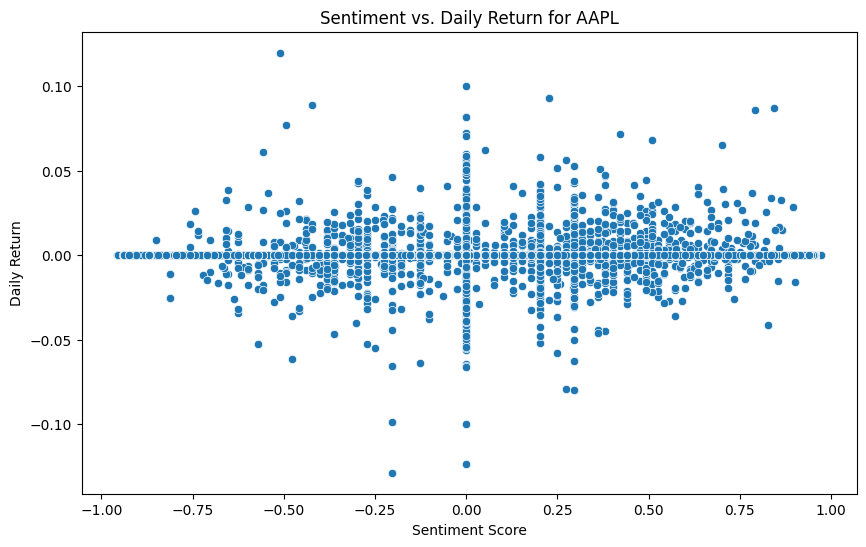

In [11]:
import seaborn as sns

# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AAPL']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for AAPL')
plt.show()

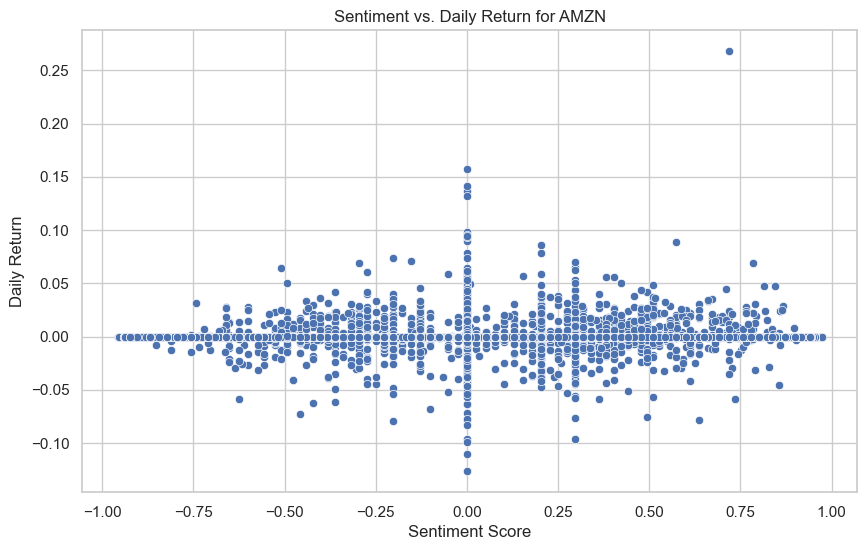

In [21]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AMZN']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for AMZN')
plt.show()

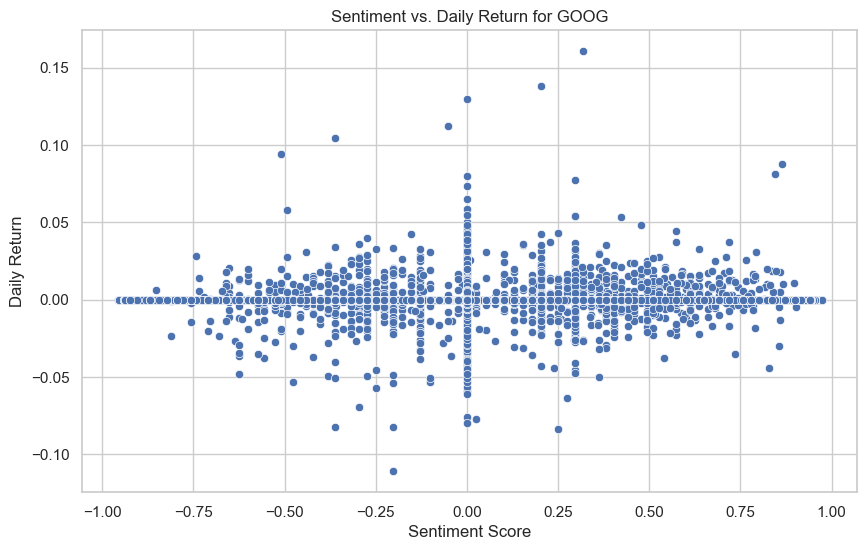

In [22]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'GOOG']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for GOOG')
plt.show()

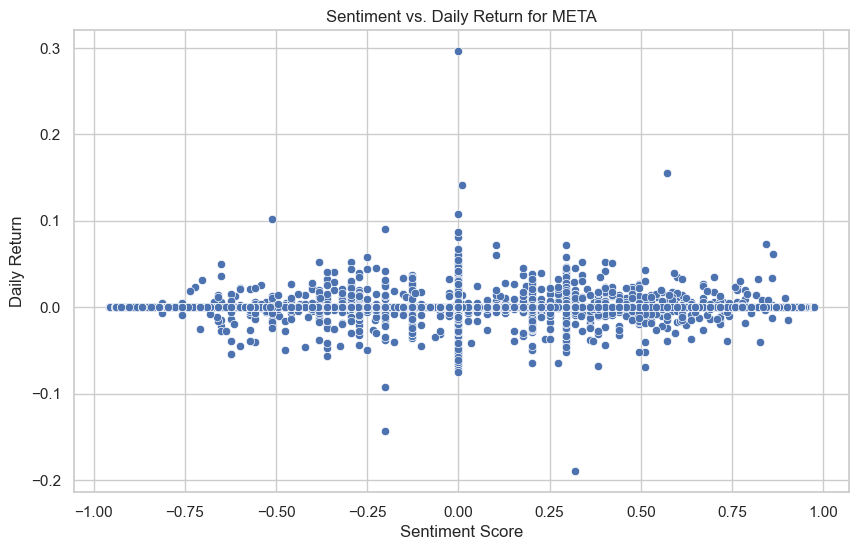

In [23]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'META']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for META')
plt.show()

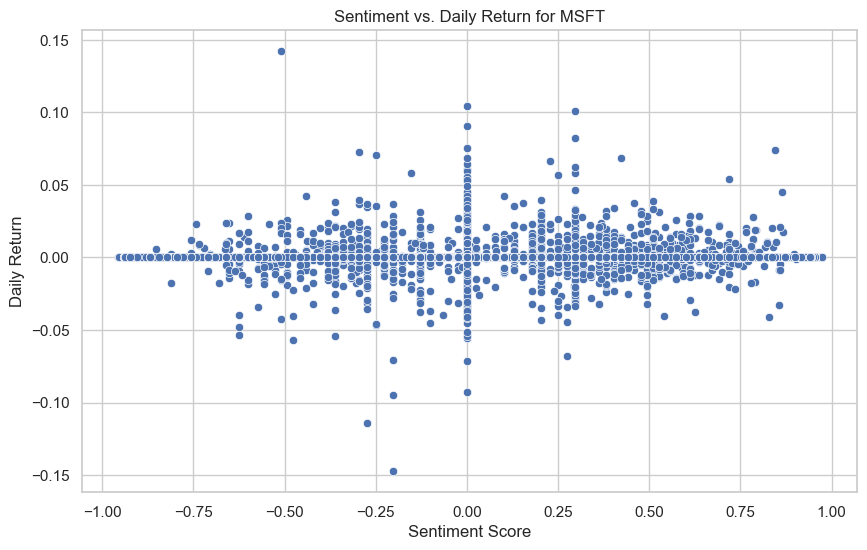

In [24]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'MSFT']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for MSFT')
plt.show()

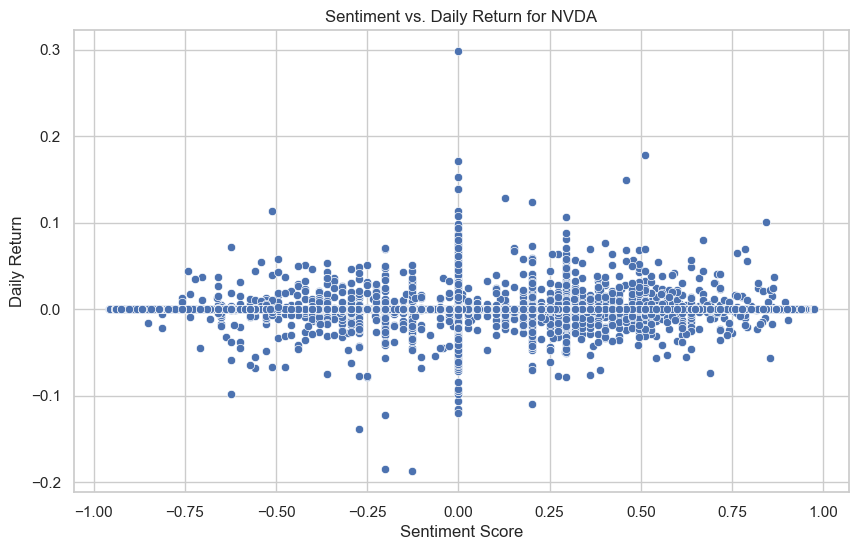

In [25]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'NVDA']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for NVDA')
plt.show()

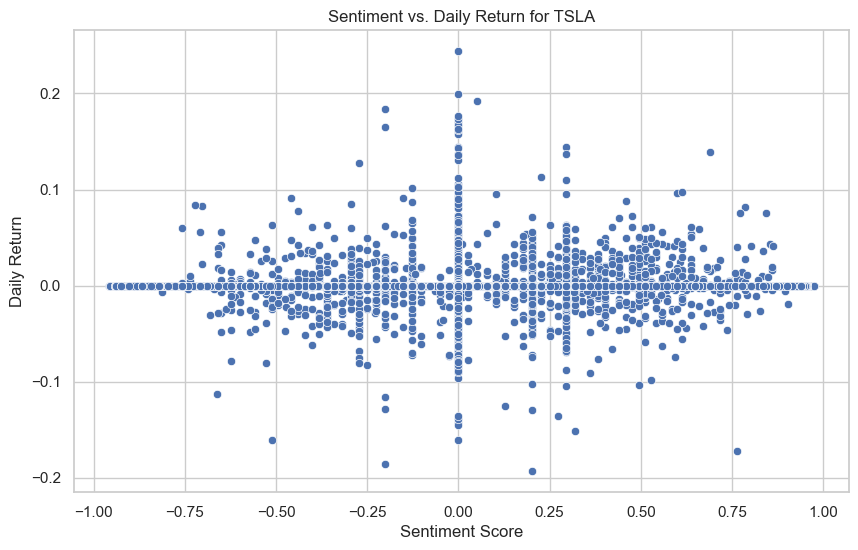

In [26]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'TSLA']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for TSLA')
plt.show()

##### Aggregating the data of the seven stocks

In [12]:
# Convert 'Date' to a datetime object if not already
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Group by Date and Stock to get mean sentiment and average stock price
grouped_data = final_data.groupby(['Date', 'Stock']).agg({
    'sentiment': 'mean',
    'Close': 'mean'
}).reset_index()

##### Time Series Plot of Sentiment and Stock Prices

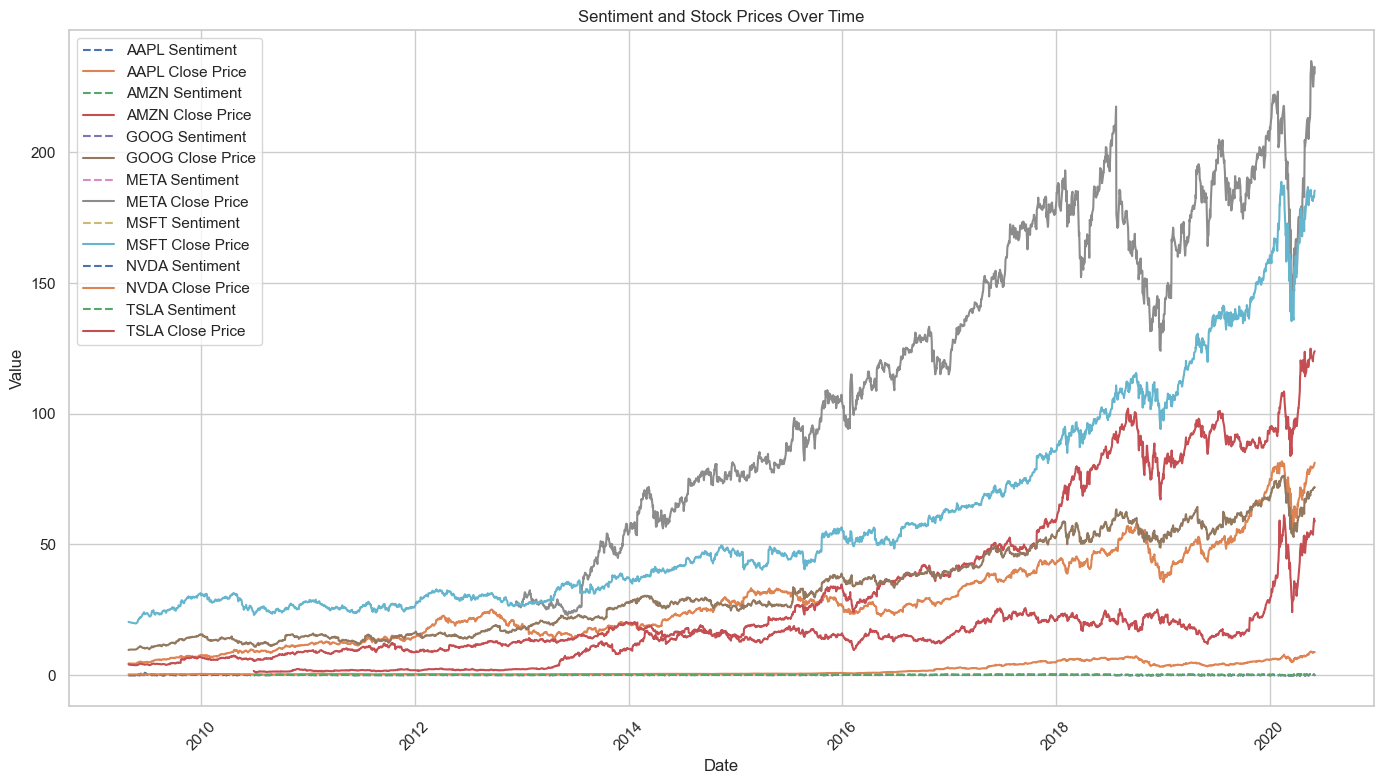

In [13]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot sentiment and stock prices for each stock
plt.figure(figsize=(14, 8))
for stock in final_data['Stock'].unique():
    stock_data = grouped_data[grouped_data['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['sentiment'], label=f'{stock} Sentiment', linestyle='--')
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock} Close Price')

plt.title('Sentiment and Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Sentiment Distribution by Stock

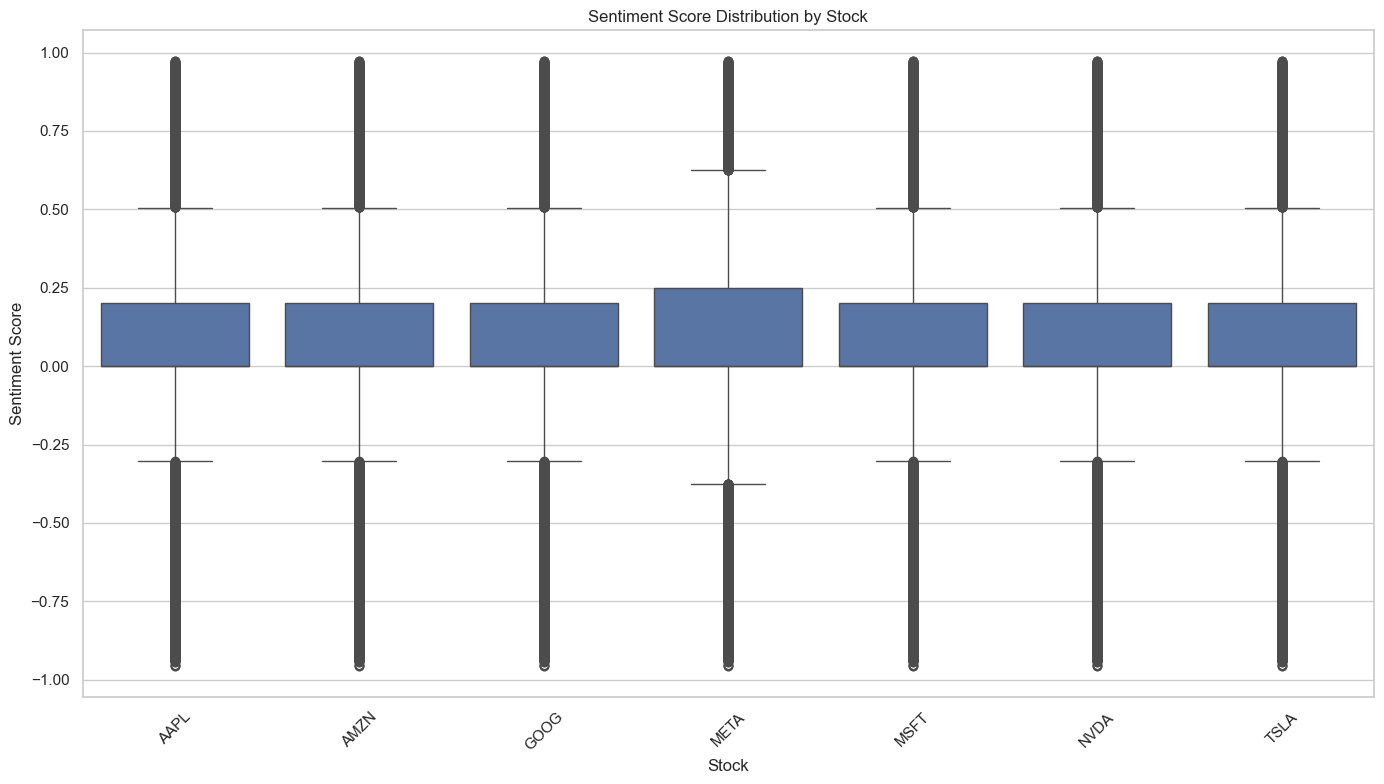

In [14]:
# Plot the distribution of sentiment scores for each stock
plt.figure(figsize=(14, 8))
sns.boxplot(x='Stock', y='sentiment', data=final_data)
plt.title('Sentiment Score Distribution by Stock')
plt.xlabel('Stock')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Filter only numeric columns for correlation matrix
numeric_data = grouped_data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.columns)
Index(['sentiment', 'Close'], dtype='object')


Index(['sentiment', 'Close'], dtype='object')


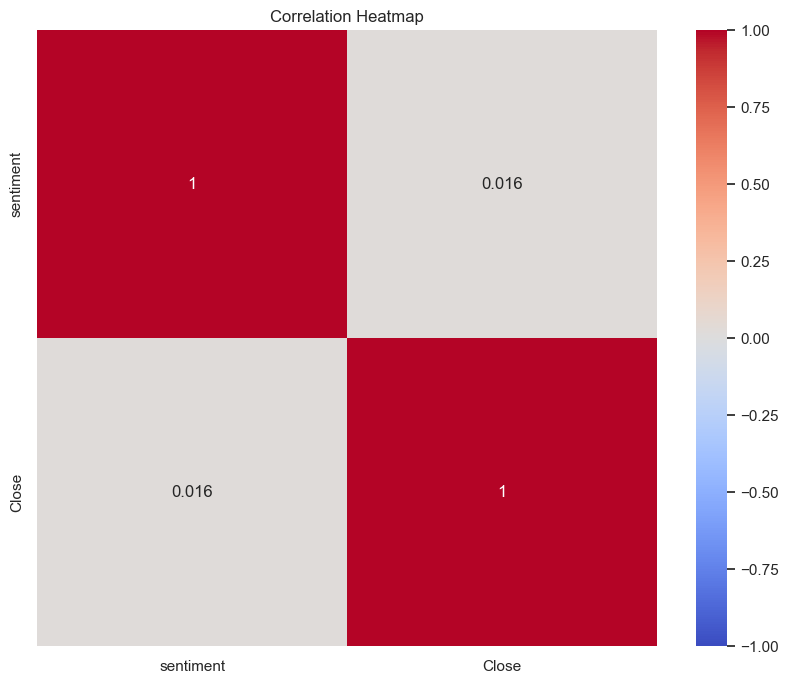

In [16]:
# Compute the correlation matrix of the aggregate
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()